In [19]:
%matplotlib ipympl

import math
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import Slider

from tools import bathymetry

In [20]:
# Paramètres du modèle

t_0 = 0 # Initial time
t_f = 2 # Max time
dt = 0.1 # Time step (days)

time = np.arange(t_0, t_f + dt, dt)

rows = 20
columns = 20
res = 1

In [21]:
# Variables
Var = np.zeros((len(time), int(rows / res), int(columns / res)))
light = np.zeros((len(time), int(rows / res), int(columns / res)))

for t in range(0, len(time)) :
  for row in range(0, Var.shape[1]) :
    for col in range(0, Var.shape[2]) :
      if (rows-row > bathymetry.bathymetry(col)) :
        light[t, row, col] = (math.sin(t) + 1) * (1 - row / rows)
      else :
        light[t, row, col] = np.nan

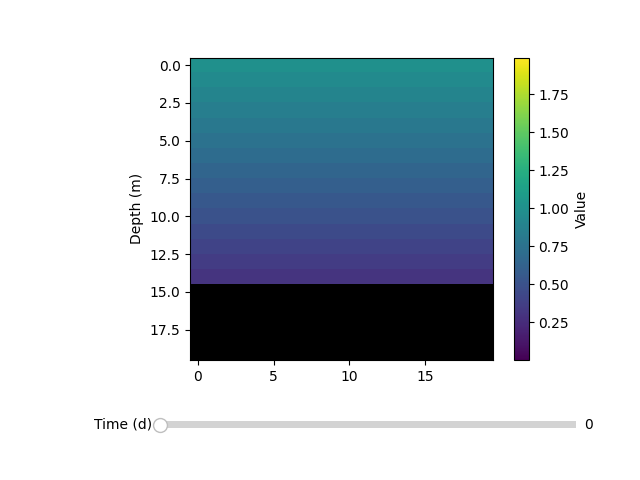

In [22]:
var = light # variable to monitor through time
max = np.nanmax(var)
min = np.nanmin(var)

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
cmap = plt.cm.viridis
cmap.set_bad('black')
tile = plt.imshow(var[0, :, :], cmap = cmap, vmin = min, vmax = max)
cbar = plt.colorbar(tile)
cbar.ax.set_ylabel('Value')
ax.set_ylabel('Depth (m)')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left = 0.25, bottom = 0.25)

# Make a horizontal slider to control the frequency.
axtime = fig.add_axes([0.25, 0.1, 0.65, 0.03])
time_slider = Slider(
    ax = axtime,
    label = 'Time (d)',
    valmin = t_0,
    valmax = t_f,
    valinit = t_0,
    valstep = dt
)

# The function to be called anytime a slider's value changes
def update(val):
    val = int(val / dt)
    ax.imshow(var[val, :, :], cmap = cmap, vmin = min, vmax = max)
    fig.canvas.draw()

# register the update function with each slider
time_slider.on_changed(update)

plt.show()